In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef
from sklearn.feature_selection import RFE
# Load the dataset
file_path = "C:/Users/aashi/Downloads/Randam_Features.csv"  # Replace with the actual file path
data = pd.read_csv(file_path)

# Prepare features (X) and target (y)
X = data.drop(columns=["Sequence_ID", "Sequence", "Label"])
y = data["Label"]

# Train-test split (90-10 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probability for the positive class

c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:33:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [3]:
# Evaluate the model on the training set
test_accuracy_1 = accuracy_score(y_test, y_pred)
test_precision_1 = precision_score(y_test, y_pred, average='binary', pos_label=1)
test_recall_1 = recall_score(y_test, y_pred, average='binary', pos_label=1)
test_f1_1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
test_mcc_1 = matthews_corrcoef(y_test, y_pred)

# Calculate specificity for the training set
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
specificity_1 = TN / (TN + FP)


#predicting on the train set itself
y_train_pred = xgb_model.predict(X_train)

# Evaluate the model on the training set
train_accuracy_1 = accuracy_score(y_train, y_train_pred)
train_precision_1 = precision_score(y_train, y_train_pred, average='binary', pos_label=1)
train_recall_1 = recall_score(y_train, y_train_pred, average='binary', pos_label=1)
train_f1_1 = f1_score(y_train, y_train_pred, average='binary', pos_label=1)
train_mcc_1 = matthews_corrcoef(y_train, y_train_pred)

# Calculate specificity for the training set
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_TN = train_conf_matrix[0, 0]
train_FP = train_conf_matrix[0, 1]
train_specificity_1 = train_TN / (train_TN + train_FP)

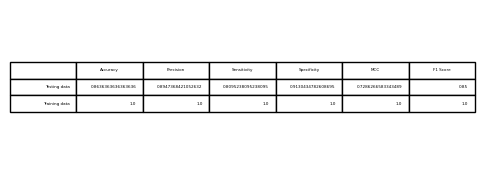

In [4]:
data_1 = {
   '' : ['Testing data', 'Training data'],
   'Accuracy' : [test_accuracy_1, train_accuracy_1],
   'Precision' : [test_precision_1, train_precision_1],
   'Sensitivity' : [test_recall_1, train_recall_1],
   'Specificity' : [specificity_1, train_specificity_1],
   'MCC' : [test_mcc_1, train_mcc_1],
   'F1 Score' : [test_f1_1, train_f1_1]
}

df = pd.DataFrame(data_1)

fig, ax = plt.subplots(figsize=(6, 2))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')

# Create a table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')

# Save as PNG
plt.savefig("lgbm_swp_results_wo_rfe.png", bbox_inches='tight', dpi=300)
plt.show()

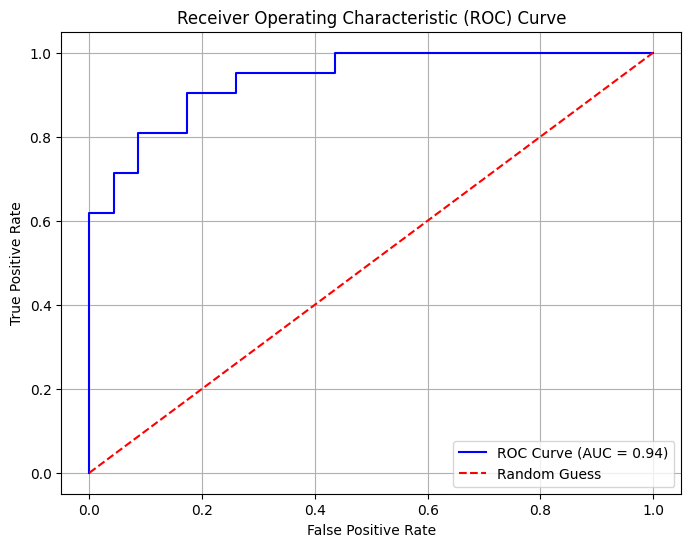

In [5]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [6]:
# Perform RFE
rfe = RFE(estimator=xgb_model, n_features_to_select=20)  # Select 20 features
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Save to a file
selected_features.to_series().to_csv("xgbm_swp_selected_features.csv", index=False)


# make new datasets with selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)
X_rfe = rfe.transform(X)

#fitting model into the rfe dataset
xgb_model.fit(X_train_rfe, y_train)

c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:33:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:33:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:33:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

Selected Features: Index(['Length', 'Molecular_formula', 'Isoelectric_point', 'Aromaticity',
       'Aliphatic_index', 'AAC_A', 'AAC_C', 'AAC_G', 'AAC_H', 'AAC_I', 'AAC_K',
       'AAC_N', 'PCP_PC', 'PCP_AL', 'PCP_HL', 'PCP_SC', 'PCP_SS_HE', 'PCP_Z1',
       'PCP_Z5', 'PAAC1_lam1'],
      dtype='object')


c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:34:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [7]:
y_pred = xgb_model.predict(X_test_rfe)

# Evaluate the model on the training set
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
test_recall = recall_score(y_test, y_pred, average='binary', pos_label=1)
test_f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
test_mcc = matthews_corrcoef(y_test, y_pred)

# Calculate specificity for the training set
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
specificity = TN / (TN + FP)

# Print results for the training set
print(f'Test Set Accuracy: {test_accuracy:.2f}')
print(f'Test Set Precision: {test_precision:.2f}')
print(f'Test Set Sensitivity (Recall): {test_recall:.2f}')
print(f'Test Set Specificity: {specificity:.2f}')
print(f'Test Set F1 Score: {test_f1:.2f}')

Test Set Accuracy: 0.84
Test Set Precision: 0.85
Test Set Sensitivity (Recall): 0.81
Test Set Specificity: 0.87
Test Set F1 Score: 0.83


In [8]:
#Make predictions on the training data
y_train_pred = xgb_model.predict(X_train_rfe)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='binary', pos_label=1)
train_recall = recall_score(y_train, y_train_pred, average='binary', pos_label=1)
train_f1 = f1_score(y_train, y_train_pred, average='binary', pos_label=1)
train_mcc = matthews_corrcoef(y_train, y_train_pred)

# Calculate specificity for the training set
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_TN = train_conf_matrix[0, 0]
train_FP = train_conf_matrix[0, 1]
train_specificity = train_TN / (train_TN + train_FP)

# Print results for the training set
print(f'Training Set Accuracy: {train_accuracy:.2f}')
print(f'Training Set Precision: {train_precision:.2f}')
print(f'Training Set Sensitivity (Recall): {train_recall:.2f}')
print(f'Training Set Specificity: {train_specificity:.2f}')
print(f'Training Set F1 Score: {train_f1:.2f}')

Training Set Accuracy: 1.00
Training Set Precision: 1.00
Training Set Sensitivity (Recall): 1.00
Training Set Specificity: 1.00
Training Set F1 Score: 1.00


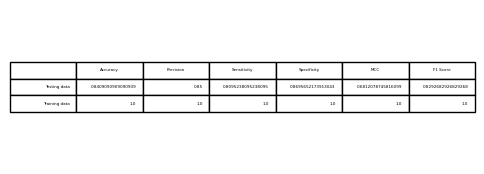

In [9]:
data = {
   '' : ['Testing data', 'Training data'],
   'Accuracy' : [test_accuracy, train_accuracy],
   'Precision' : [test_precision, train_precision],
   'Sensitivity' : [test_recall, train_recall],
   'Specificity' : [specificity, train_specificity],
   'MCC' : [test_mcc, train_mcc],
   'F1 Score' : [test_f1, train_f1]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(6, 2))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')

# Create a table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')

# Save as PNG
plt.savefig("lgbm_swp_results.png", bbox_inches='tight', dpi=300)
plt.show()

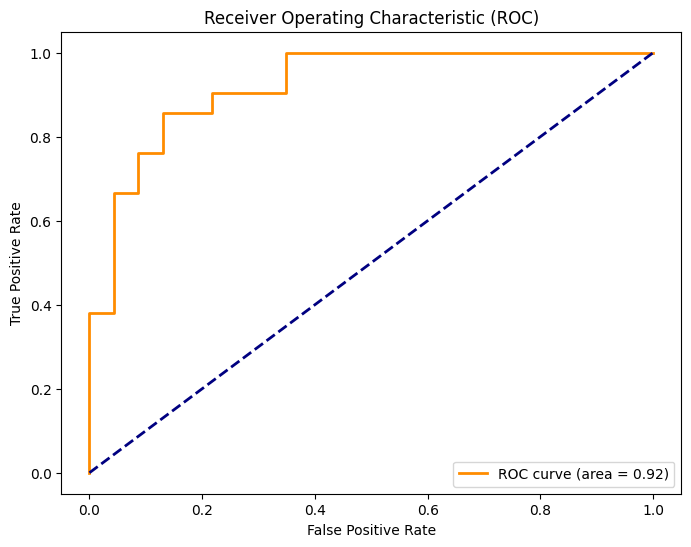

In [10]:
y_pred_proba = xgb_model.predict_proba(X_test_rfe)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_plot = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_plot:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [11]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for X after RFE
scores = cross_val_score(xgb_model, X_rfe, y, cv=cv, scoring='f1')

print("Cross-validation scores:", scores)
print("Mean f1 score with RFE:", scores.mean())

c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:34:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:34:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:34:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

Cross-validation scores: [0.85106383 0.7804878  0.79487179 0.84090909 0.81818182]
Mean f1 score with RFE: 0.8171028677255974


c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:34:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [12]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for whole X
scores = cross_val_score(xgb_model, X, y, cv=cv, scoring='f1')

print("Cross-validation scores:", scores)
print("Mean f1 score without RFE:", scores.mean())

c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:34:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:34:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:34:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

Cross-validation scores: [0.88421053 0.75294118 0.75       0.82352941 0.76190476]
Mean f1 score without RFE: 0.794517175291169
